## Image processing

In [2]:
import tensorflow as tf
from PIL import Image

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x395 at 0x7FAC2E196C50>


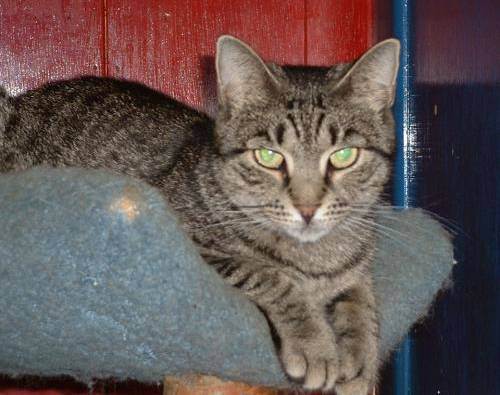

In [4]:
filename = 'pics/cat.881.jpg'
image = Image.open(filename)
print(image)
image

**tf.convert_to_tensor**

> Works on both **numpy** and **PIL** objects.

> Returns a **uint8** tensor

In [7]:
image_tensor = tf.convert_to_tensor(image)
print(image_tensor)

Tensor("Const_1:0", shape=(395, 500, 3), dtype=uint8)


### Resizing

> **tf.image.resize_images** expects a **float tensor** (with pixels in range 0-1) and returns a **float_tensor**

> Use **tf.image.convert_image_dtype**. Using **tf.cast** will destroy the image  

In [17]:
float_image_tensor = tf.image.convert_image_dtype(image_tensor,tf.float32)
print(float_image_tensor)
float_resized_image = tf.image.resize_images(float_image_tensor,(224,224))
print(resized_image)

Tensor("convert_image_1:0", shape=(395, 500, 3), dtype=float32)
Tensor("resize_images_2/Squeeze:0", shape=(224, 224, 3), dtype=float32)


> **PIL.Image.fromarray** expects a **uint array** 

Tensor("convert_image_2:0", shape=(224, 224, 3), dtype=uint8)
(224, 224, 3)


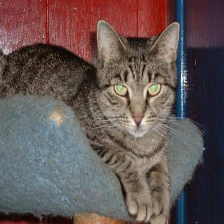

In [27]:
uint_resized_image = tf.image.convert_image_dtype(float_resized_image,tf.uint8)
print(unint_resized_image)
with tf.Session() as sess:
    out = sess.run(uint_resized_image)
    print(out.shape)

Image.fromarray(out)

### Central crop

> Works on both **uint** and **float tensors**

In [38]:
central_crop_image = tf.image.central_crop(image_tensor,central_fraction=0.5)
#central_crop_image = tf.image.central_crop(float_image_tensor,central_fraction=0.5)
central_crop_image

<tf.Tensor 'central_crop_5/Slice:0' shape=(199, 250, 3) dtype=uint8>

(199, 250, 3)


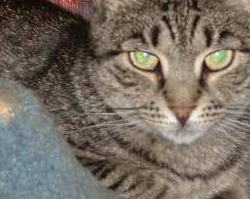

In [39]:
with tf.Session() as sess:
    out = sess.run(tf.image.convert_image_dtype(central_crop_image,tf.uint8))
    print(out.shape)

Image.fromarray(out)

### Flip up and down

> Works on both **uint** and **float tensors**

In [48]:
flip_image = tf.image.flip_up_down(float_resized_image)
#flip_image = tf.image.flip_up_down(uint_resized_image)

print(flip_image)

Tensor("flip_up_down_5/ReverseV2:0", shape=(224, 224, 3), dtype=float32)


(224, 224, 3)


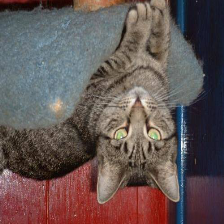

In [49]:
with tf.Session() as sess:
    out = sess.run(tf.image.convert_image_dtype(flip_image,tf.uint8))
    print(out.shape)

Image.fromarray(out)

### Color adjustments

> For all **color adjustment** operations like **brightness, contrast, saturation, hue**, tensorflow expects **uint** image. Does **NOT work** on **float images**

In [59]:
bright_image = tf.image.adjust_brightness(uint_resized_image,delta=0.5)
#bright_image = tf.image.adjust_brightness(float_resized_image,delta=0.5) #Doesnt work
print(bright_image)

Tensor("adjust_brightness_4/convert_image_1:0", shape=(224, 224, 3), dtype=uint8)


(224, 224, 3)


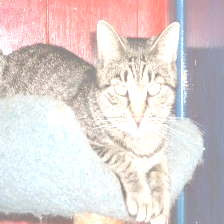

In [60]:
with tf.Session() as sess:
    out = sess.run(tf.image.convert_image_dtype(bright_image,tf.uint8))
    print(out.shape)

Image.fromarray(out)

### Random adjustments

> Use **tf.image.random_** methods

> See **TF-Exercise** for [examples](https://github.com/as641651/TF-Exercise/blob/master/Image_Processing/Image_Processing.ipynb)